<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Patent-Numbers" data-toc-modified-id="Patent-Numbers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Patent Numbers</a></span></li><li><span><a href="#Primary-Examiners" data-toc-modified-id="Primary-Examiners-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Primary Examiners</a></span></li><li><span><a href="#Attorneys" data-toc-modified-id="Attorneys-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Attorneys</a></span></li><li><span><a href="#Publication-Dates" data-toc-modified-id="Publication-Dates-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Publication Dates</a></span></li><li><span><a href="#Abstracts" data-toc-modified-id="Abstracts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Abstracts</a></span></li></ul></div>

In [202]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from scipy import stats
import datetime as dt
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [3]:
in_path = 'test1k'
with open(f'{in_path}.json', 'r') as f:
    patent_data = json.load(f)

patent_nres = [float(i) for i in list(patent_data.keys())]

print(f'Minimum patent result number : {min(patent_nres)}\nMaximum patent result number : {max(patent_nres)}')


Minimum patent result number : 1.0
Maximum patent result number : 400.0


In [4]:
### Reminder of keys in dictionary
list(list(patent_data.values())[0].keys())

['page_url',
 'primary_examiner',
 'attorney',
 'publication_date',
 'document_number',
 'patent_number',
 'inventors',
 'applicant',
 'abstract',
 'claims',
 'cited_references',
 'other_references']

### Patent Numbers

In [86]:
patent_numbers = [int(i['document_number'].replace(',', '')) for i in patent_data.values()]
patent_numbers = [i for i in patent_numbers if i > 2]
import statistics
patent_numbers_stdev = statistics.stdev(patent_numbers)
patent_numbers_mean = statistics.mean(patent_numbers)
patent_numbers_z = [(i-patent_numbers_mean) / patent_numbers_stdev for i in patent_numbers]
print(f'Minimum patent number : {min(patent_numbers)}\nMaximum patent number : {max(patent_numbers)}')
print(f'Minimum patent z-score : {min(patent_numbers_z)}\nMaximum patent z-score : {max(patent_numbers_z)}')
print(f'Unscaled summary : \n{stats.describe(patent_numbers)}')
print(f'Scaled summary : \n{stats.describe(patent_numbers_z)}')


Minimum patent number : 857723
Maximum patent number : 10487346
Minimum patent z-score : -19.444147645789624
Maximum patent z-score : 0.36413177000944963
Unscaled summary : 
DescribeResult(nobs=392, minmax=(857723, 10487346), mean=10310326.502551021, variance=236333377998.5524, skewness=-18.820483663670682, kurtosis=363.5142514564085)
Scaled summary : 
DescribeResult(nobs=392, minmax=(-19.444147645789624, 0.36413177000944963), mean=-1.323204584451207e-15, variance=0.9999999999999996, skewness=-18.820483663670686, kurtosis=363.51425145640854)


The abnormal distribution of the patent numbers makes it difficult to show all the data but below, I've plotted an example of the unscaled, untruncated plot and then another plot which shows a fairly even distribution within a certain range. 

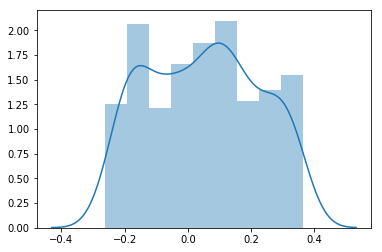

In [95]:
sns.distplot([i for i in patent_numbers_z if i > -10])
plt.show()

### Primary Examiners

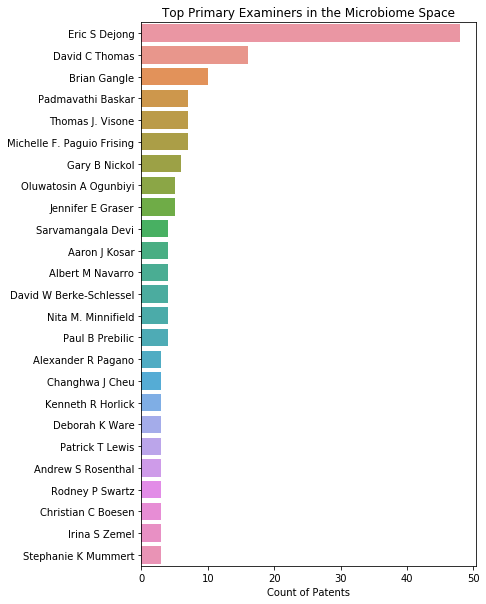

In [103]:
PEs = [i['primary_examiner'] for i in patent_data.values()]
PEs = [i.split('; ')[1] + ' ' + i.split('; ')[0] for i in PEs]
PEs_count = dict(collections.Counter(PEs))
n = 25
top_PE_list = sorted(PEs_count, key=PEs_count.get, reverse=True)[:n]
top_PEcount_list = [PEs_count[i] for i in top_PE_list]

fig = plt.figure(figsize=(6,10))
sns.barplot(top_PEcount_list, top_PE_list)
plt.title('Top Primary Examiners in the Microbiome Space')
plt.xlabel('Count of Patents')
plt.show()

### Attorneys

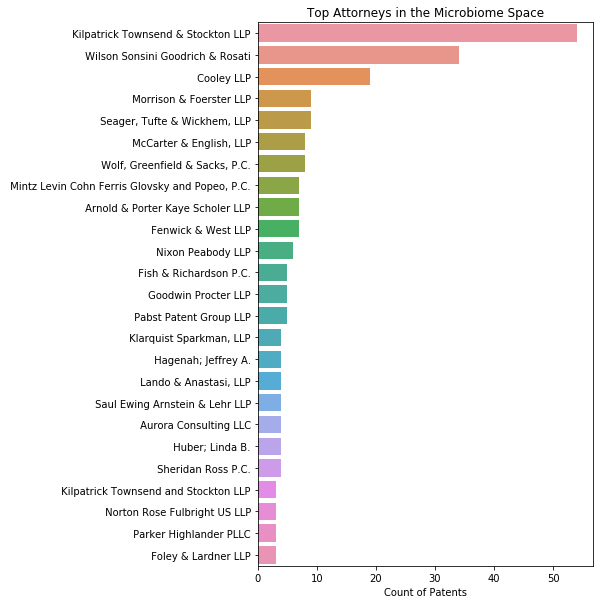

In [104]:
attorneys = [i['attorney'] for i in patent_data.values() if i['attorney'] != '']
attorneys = [i.replace('amp;', '') for i in attorneys]
attorneys_count = dict(collections.Counter(attorneys))
n = 25
top_attorney_list = sorted(attorneys_count, key=attorneys_count.get, reverse=True)[:n]
top_att_count_list = [attorneys_count[i] for i in top_attorney_list]

fig = plt.figure(figsize=(6,10))
sns.barplot(top_att_count_list, top_attorney_list)
plt.title('Top Attorneys in the Microbiome Space')
plt.xlabel('Count of Patents')
plt.show()

### Publication Dates

In [190]:
pub_dates = [i['publication_date'] for i in patent_data.values() if i['publication_date'] != '']
pub_dates = [i.replace('rch', 'Mar').replace('ary', 'Feb').replace('ust', 'Aug') for i in pub_dates]
### One could argue this substitution but the effect is minor
pub_dates = [i.replace('ber', 'Oct') for i in pub_dates]
#pub_dates = [i.replace('ber', 'Nov') for i in pub_dates]
pub_dates = [dt.datetime.strptime(i, '%b %d, %Y') for i in pub_dates]

In [188]:
pub_months = [str(i.year) + '-' + f'{i.month:02d}' for i in pub_dates]
pub_month_count = dict(collections.Counter(pub_months))
n = 25
top_pubmonth_list = sorted(pub_month_count, key=pub_month_count.get, reverse=True)[:n]
top_pubmonth_count_list = [pub_month_count[i] for i in top_pubmonth_list]


pub_years = [str(i.year) for i in pub_dates]
pub_year_count = dict(collections.Counter(pub_years))
n = 25
top_pubyear_list = sorted(pub_year_count, key=pub_year_count.get, reverse=True)[:n]
top_pubyear_count_list = [pub_year_count[i] for i in top_pubyear_list]


all_pub_months_list = sorted(pub_month_count, reverse=False)
all_pubmonth_count_list = [pub_month_count[i] for i in all_pub_months_list]

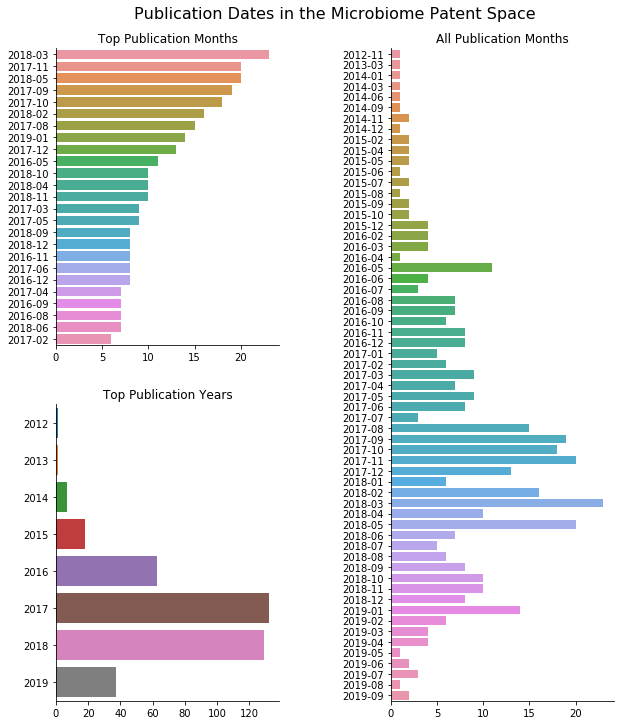

In [189]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)    # The big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.5)
plt.title('Publication Dates in the Microbiome Patent Space', pad=30, fontsize=16)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0])
ax3 = fig.add_subplot(grid[:,1])
sns.despine()

sns.barplot(top_pubmonth_count_list, top_pubmonth_list, ax=ax1)
sns.barplot(top_pubyear_count_list, top_pubyear_list, ax=ax2, orient='horizontal')
sns.barplot(all_pubmonth_count_list, all_pub_months_list, ax=ax3, orient='horizontal')

ax1.set_title('Top Publication Months')
ax2.set_title('Top Publication Years')
ax3.set_title('All Publication Months')


plt.show()

### Abstracts

In [221]:
abstracts = [i['abstract'].lower() for i in patent_data.values()]

abstracts = [re.sub('[,;#()-:]|(\.)|(\.$)', '', i) for i in abstracts]

abstracts[0]

'the invention provides compositions and methods for engineering bacteria to produce fucosylated oligosaccharides and the use thereof in the prevention or treatment of infection'

In [222]:
stop_words = set(stopwords.words('english')) 
fil_abstracts = []
corpus = []
for abstract in abstracts:
    word_tokens = word_tokenize(abstract)
  
    filtered_abstract = [w for w in word_tokens if not w in stop_words]
    corpus += filtered_abstract
    
    fil_abstracts.append(filtered_abstract)
    
corpus = list(set(corpus))
fil_abstracts[0]

['invention',
 'provides',
 'compositions',
 'methods',
 'engineering',
 'bacteria',
 'produce',
 'fucosylated',
 'oligosaccharides',
 'use',
 'thereof',
 'prevention',
 'treatment',
 'infection']

In [223]:
### Term Frequency across all abstracts
tf_dict = {}

for abstract_words in fil_abstracts:
    for word in abstract_words:
        if word not in tf_dict.keys():
            tf_dict[word] = 1
        else:
            tf_dict[word] += 1


### Document Frequency counting number of abstracts a word appears in
df_dict = {}

for abstract_words in fil_abstracts:
    for word in set(abstract_words):
        if word not in df_dict.keys():
            df_dict[word] = 1
        else:
            df_dict[word] += 1

In [224]:
n = 25
top_term_list = sorted(tf_dict, key=tf_dict.get, reverse=True)[:n]
top_term_count_list = [tf_dict[i] for i in top_term_list]

n = 25
top_df_list = sorted(df_dict, key=df_dict.get, reverse=True)[:n]
top_df_count_list = [tf_dict[i] for i in top_term_list]

In [234]:
ab_text_year_month = {}
for abstract, year_month in zip(fil_abstracts, pub_months):
    if year_month not in ab_text_year_month.keys():
        ab_text_year_month[year_month] = abstract
    else:
        ab_text_year_month[year_month] += abstract
        
common_terms_by_time = {}   
for common_term in top_term_list:
    common_terms_by_time[common_term] = {}
    for year_month in sorted(ab_text_year_month.keys()):
        word_count = 0
        for word in ab_text_year_month[year_month]:
            if common_term == word:
                word_count += 1
                continue
        common_terms_by_time[common_term][year_month] = word_count
        
common_terms_by_time

{'methods': {'2012-11': 3,
  '2013-03': 1,
  '2014-01': 2,
  '2014-03': 0,
  '2014-06': 0,
  '2014-09': 0,
  '2014-11': 0,
  '2014-12': 1,
  '2015-02': 21,
  '2015-04': 7,
  '2015-05': 1,
  '2015-06': 0,
  '2015-07': 0,
  '2015-08': 0,
  '2015-09': 10,
  '2015-10': 1,
  '2015-12': 15,
  '2016-02': 11,
  '2016-03': 21,
  '2016-04': 1,
  '2016-05': 21,
  '2016-06': 22,
  '2016-07': 12,
  '2016-08': 43,
  '2016-09': 31,
  '2016-10': 23,
  '2016-11': 35,
  '2016-12': 25,
  '2017-01': 8,
  '2017-02': 28,
  '2017-03': 27,
  '2017-04': 32,
  '2017-05': 32,
  '2017-06': 25,
  '2017-07': 11,
  '2017-08': 76,
  '2017-09': 37,
  '2017-10': 81,
  '2017-11': 86,
  '2017-12': 57,
  '2018-01': 22,
  '2018-02': 62,
  '2018-03': 70,
  '2018-04': 31,
  '2018-05': 56,
  '2018-06': 6,
  '2018-07': 15,
  '2018-08': 10,
  '2018-09': 41,
  '2018-10': 31,
  '2018-11': 31,
  '2018-12': 10,
  '2019-01': 60,
  '2019-02': 35,
  '2019-03': 10,
  '2019-04': 31,
  '2019-05': 2,
  '2019-06': 6,
  '2019-07': 10,
  '20

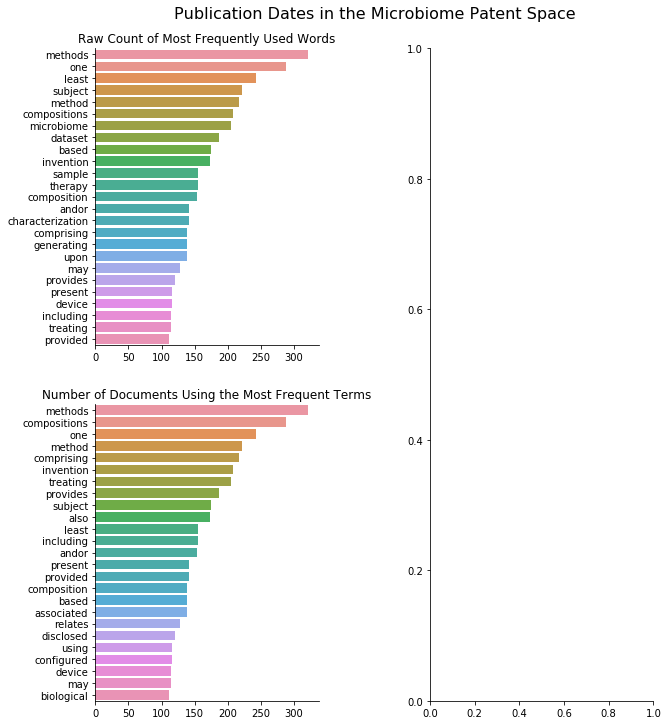

In [227]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)    # The big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.5)
plt.title('Publication Dates in the Microbiome Patent Space', pad=30, fontsize=16)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0])
ax3 = fig.add_subplot(grid[:,1])
sns.despine()

sns.barplot(top_term_count_list, top_term_list, ax=ax1)
sns.barplot(top_df_count_list, top_df_list, ax=ax2, orient='horizontal')
#sns.barplot(all_pubmonth_count_list, all_pub_months_list, ax=ax3, orient='horizontal')

ax1.set_title('Raw Count of Most Frequently Used Words')
ax2.set_title('Number of Documents Using the Most Frequent Terms')
#ax3.set_title('All Publication Months')


plt.show()